# Принятие решений в бизнесе


## Введение

### Цель работы:

Провести приоритезацию гипотез с помощью фреймворков `ICE` и `RICE`.  Объяснить разницу в приоритетах у этих дух фреймворков.

Провести анализ данных, полученных при A/B-тестировании. Определить существует ли разница между группами.



### Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Дано 3 датафрейма, для первого необходимо провести приоритизацию гипотез. С помощью двух других провести анализ A/B-теста.
1. Гипотезы - hypothesis.csv:
   - `Hypothesis` — краткое описание гипотезы;
   - `Reach` — охват пользователей по 10-балльной шкале;
   - `Impact` — влияние на пользователей по 10-балльной шкале;
   - `Confidence` — уверенность в гипотезе по 10-балльной шкале;    
   - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
   
   
   
2. Заказы - orders.csv:
    - `transactionId` — идентификатор заказа;
    - `visitorId` — идентификатор пользователя, совершившего заказ;
    - `date` — дата, когда был совершён заказ;
    - `revenue` — выручка заказа;
    - `group` — группа A/B-теста, в которую попал заказ.
    
    
3. Посещения - visitors.csv:
    - `date` — дата;
    - `group` — группа A/B-теста;
    - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.


### Используемые библиотеки и модули

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from scipy import stats
from math import factorial

from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(12, 7)})

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Приоритизация гипотез

### Загрузка данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Приоритизация методом `ICE`

In [4]:
hypothesis['ICE'] = round(hypothesis.impact * hypothesis.confidence / hypothesis.efforts, 2)
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Приоритизация методом `RICE`

In [5]:
hypothesis['RICE'] = (
    round(
        hypothesis.impact * hypothesis.confidence * hypothesis.reach /
        hypothesis.efforts, 
        2)
)
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Выводы:

Наиболее выжными можно выделить следующие гипотезы: 0, 2, 6, 7, 8.

Изменение приоритетов при применении фреймворков `RICE` и `ICE` связанно с параметром `reach`. Данный параметр не учитывается в методе `ICE`, поэтому при использовании метода `RICE` наиболее важными гипотезами стали те, у которых наиболее высокий параметр `reach`

## Анализ A/B-теста

### Загрузка и предъобработка данных

#### Данные по заказам

In [6]:
orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'], dayfirst=1)
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


PS:Знаю, что часто пишут переменные не через `'_'`, а через большую букву, но ведь и первая тогда обычно тоже большая, разве нет?... Меняю, так как мне удобней через `'_'`

Пример: `TransactionId`

In [7]:
print(
    f'Дата начала теста: {orders.date.min()}; \
    \nДата завершение теста: {orders.date.max()}'
)

Дата начала теста: 2019-08-01 00:00:00;     
Дата завершение теста: 2019-08-31 00:00:00


In [8]:
orders = orders.rename(columns={'transactionId':'transaction_id',
                        'visitorId':'visitor_id'})
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
print(f"Дубликаты: {orders.duplicated().sum()}")

Дубликаты: 0


In [10]:
duples = orders.groupby('visitor_id')['group'].nunique()
pd.DataFrame(duples.head())

,group
visitor_id,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


In [11]:
print(f'Пользователи, попавшие в обе группы: {(duples.values>1).sum()}')

Пользователи, попавшие в обе группы: 58


In [12]:
duples = duples[duples.values>1]
orders = orders.query('visitor_id not in @duples.index')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


#### Данные по посещениям

In [13]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'], dayfirst=True)
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
print(
    f'Дата начала теста: {visitors.date.min()}; \
    \nДата завершение теста: {visitors.date.max()}'
)

Дата начала теста: 2019-08-01 00:00:00;     
Дата завершение теста: 2019-08-31 00:00:00


In [15]:
print(f"Дубликаты: {visitors.duplicated().sum()}")

Дубликаты: 0


#### Выводы:

Данные были приведены к необходимым типам, изменены названия столбцов в датасете `orders`. В датасетах отсутствуют пропуски и дубликаты. В датасете `orders` содержалось 58 пользователей попавших в 2 группы, данные пользователи были удалены из выборки.

Тест проблился 31 день, даты налача и завершения теста в датасетах не расходятся.

PS: Понимаю, что удалив пользователей, попавших в 2 группы, датасет с посещениями становится некорректным. Но оставлять ведь этих пользователей тоже неправильно... И тут возникает вопрос:**"Таки шо делать?"**

### Кумулятивная выручка

In [16]:
dates_groups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

orders_aggregated = (dates_groups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',
                                 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'], ignore_index=1))
 
orders_aggregated 

,date,group,transaction_id,visitor_id,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,17,17,59758
2,2019-08-02,A,42,36,234381
3,2019-08-02,B,40,39,221801
4,2019-08-03,A,66,60,346854
...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610
58,2019-08-30,A,460,437,3311413
59,2019-08-30,B,531,511,4955833
60,2019-08-31,A,468,445,3364656


In [17]:
visitors_aggregated = (dates_groups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'], ignore_index=1))
visitors_aggregated

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338
3,2019-08-02,B,1294
4,2019-08-03,A,1845
...,...,...,...
57,2019-08-29,B,17708
58,2019-08-30,A,18037
59,2019-08-30,B,18198
60,2019-08-31,A,18736


In [18]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


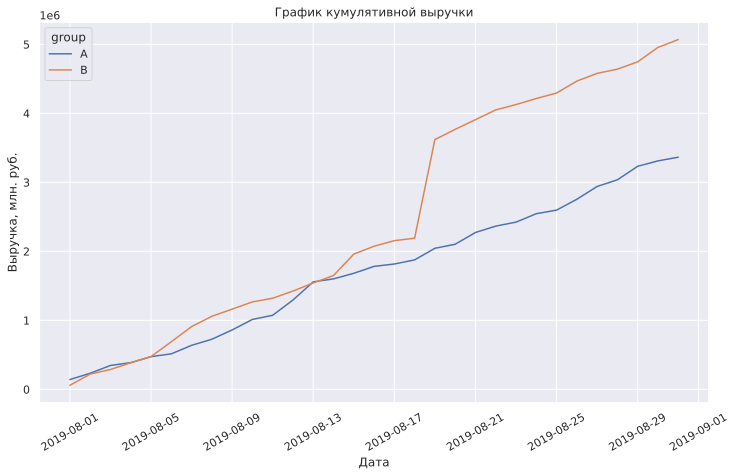

In [19]:
fig = sns.lineplot(data=cumulative_data,
                   x='date', 
                   y='revenue', 
                   hue='group')

fig.set(xlabel='Дата',
        ylabel='Выручка, млн. руб.',
        title='График кумулятивной выручки')

plt.xticks(rotation=30)
plt.show()

In [20]:
( 
    orders.query('group == "B"')
          .groupby('date')
          .agg({'transaction_id' : 'nunique', 
                'visitor_id' : 'nunique', 
                'revenue' : 'sum'})
          .sort_values(by='date')
          .loc['2019-08-18':'2019-08-20']
)

,transaction_id,visitor_id,revenue
date,,,
2019-08-18,7,7,35323
2019-08-19,21,20,1429920
2019-08-20,20,20,147274


In [21]:
orders.query('date == "2019-08-19" and group == "B"').sort_values('revenue', ascending=0)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B
423,4161654914,990904712,2019-08-19,11249,B
523,1739748874,522292794,2019-08-19,4880,B
367,1033377712,3860669668,2019-08-19,3990,B
529,90109939,2075769885,2019-08-19,3525,B
426,19467429,2397843657,2019-08-19,2630,B


Выручка в обеих группах растёт. Выручка группы B выше на протяжении всего месяца. Помимо этого группе В наблюдается сильный скачок 18 числа. Это является следствием очень большого заказа (заказ на сумму 1294500 рублей)

### Кумулятивный средний чек

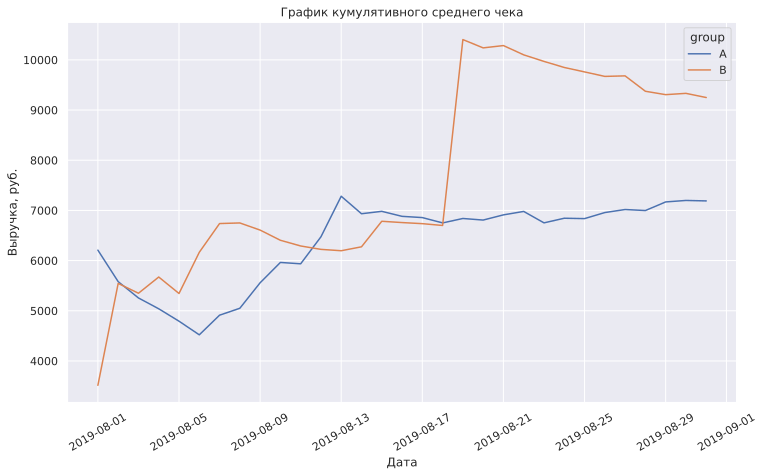

In [22]:
cumulative_data['avg'] = cumulative_data['revenue'] / cumulative_data['orders']

fig = sns.lineplot(data=cumulative_data,
                   x='date', 
                   y='avg', 
                   hue='group')

fig.set(xlabel='Дата',
        ylabel='Выручка, руб.',
        title='График кумулятивного среднего чека')

plt.xticks(rotation=30)
plt.show()

In [23]:
( 
    orders.query('group == "B"')
          .groupby('date')
          .agg({'transaction_id' : 'nunique', 
                'visitor_id' : 'nunique', 
                'revenue' : 'mean'})
          .sort_values(by='date')
          .loc['2019-08-18':'2019-08-25']
)

,transaction_id,visitor_id,revenue
date,,,
2019-08-18,7,7,5046.142857
2019-08-19,21,20,68091.428571
2019-08-20,20,20,7363.700000
2019-08-21,12,12,11695.583333
2019-08-22,21,21,6748.952381
2019-08-23,13,13,5943.769231
2019-08-24,14,14,6276.142857
2019-08-25,12,12,6604.750000


Средний чек в группе A за первые две недели подрос и стабилизировался. Группа B резко подскочила в середине теста, а затем стала плавно снижаться.

### Относительное изменение кумулятивного среднего чека группы B к группе A

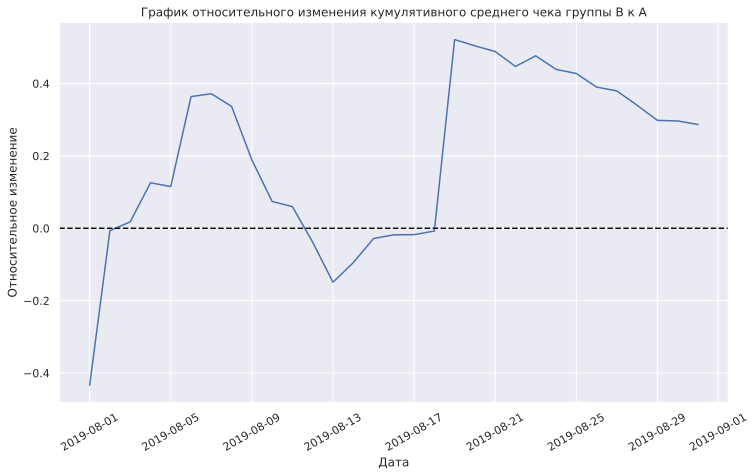

In [24]:
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][
    ['date', 'revenue', 'orders']
]

cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, 
                                                       left_on='date', 
                                                       right_on='date', 
                                                       how='left', 
                                                       suffixes=['A', 'B'])

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) /
         (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=30)
plt.title('График относительного изменения кумулятивного среднего чека группы В к А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()

В нескольких точках график резко «скачет». Скорее всего имеются выбросы в суммах заказов за день.

### Кумулятивное значение среднего количества заказов на посетителя по группам

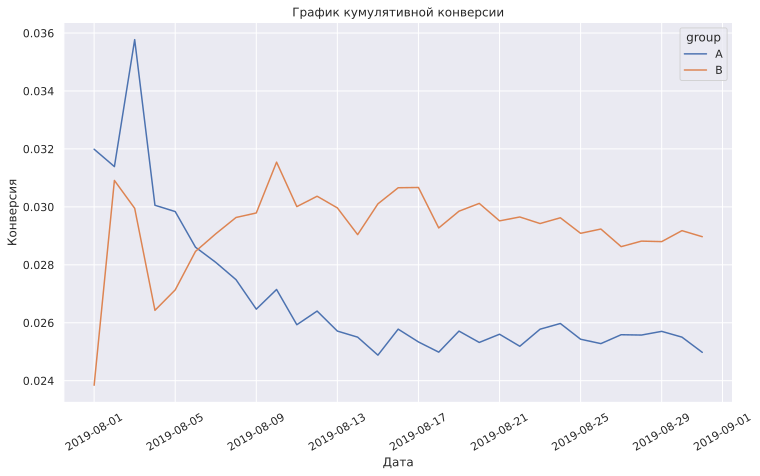

In [25]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.legend(title='group')
plt.xticks(rotation=30)
plt.title('График кумулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста сегмент A имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.

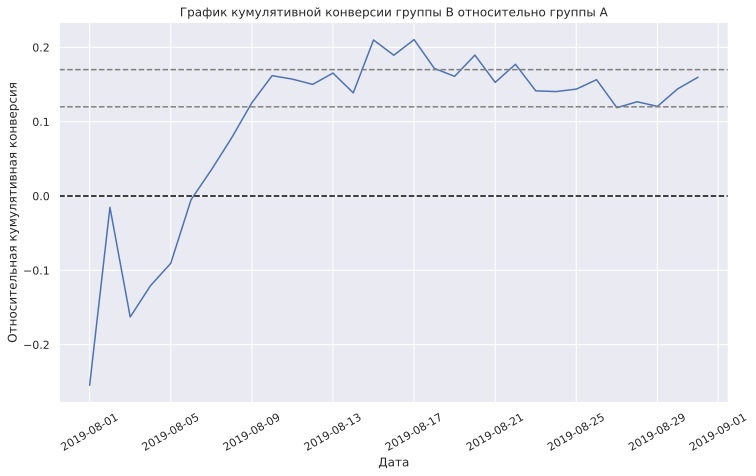

In [26]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                               left_on='date', 
                                                                               right_on='date',
                                                                               how='left', 
                                                                               suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA']-1)

plt.xticks(rotation=30)
plt.title('График кумулятивной конверсии группы В относительно группы А')
plt.xlabel('Дата')
plt.ylabel('Относительная кумулятивная конверсия')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.17, color='grey', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')

plt.show()

Почти с самого начала теста группа B лидирует по метрике: становилась лучше и лучше, затем зафиксировалась около прироста в 12-17% относительно группы A.

### Количества заказов по пользователям

In [27]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [28]:
orders_by_users = (orders.groupby(['visitor_id', 'group'], as_index=0)
                         .agg({'transaction_id': 'nunique'})
                         .sort_values(by='transaction_id', ascending=0)
                 )

orders_by_users.columns = ['visitor_id','group', 'orders']

orders_by_users.head()

,visitor_id,group,orders
908,3967698036,A,3
55,249864742,B,3
478,2108163459,A,3
687,2988190573,A,3
890,3908431265,A,3


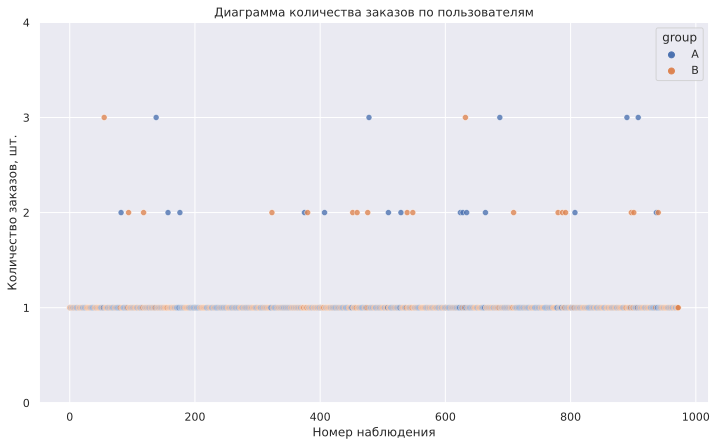

In [29]:
fig = sns.scatterplot(data=orders_by_users,
                      x=pd.Series(range(0, len(orders_by_users))), 
                      y="orders", 
                      hue='group',
                      hue_order=['A', 'B'],
                      alpha=0.8)

fig.set(xlabel='Номер наблюдения',
        ylabel='Количество заказов, шт.',
        title='Диаграмма количества заказов по пользователям',
        yticks=range(0,5))
plt.show()

In [30]:
pd.DataFrame(orders_by_users.groupby('orders')['visitor_id'].count())

,visitor_id
orders,
1,937
2,29
3,7


Большинство покупателей сделали только один заказ. **29** пользователей сделавших **2** заказа, а пользователе оформивших **3** заказа всего **7**.

### 95-й и 99-й перцентили количества заказов на пользователя

In [31]:
print(f"Количество заказов для 5% пользователей: {np.percentile(orders_by_users.orders, [95, 99])[0]}\
      \nКоличество заказов для 1% пользователей: {np.percentile(orders_by_users.orders, [95, 99])[1]}") 

Количество заказов для 5% пользователей: 1.0      
Количество заказов для 1% пользователей: 2.0


За нижнюю границу числа заказов возьмем значение **2**. Отсеем аномальных пользователей по ней.

### Cтоимость заказов

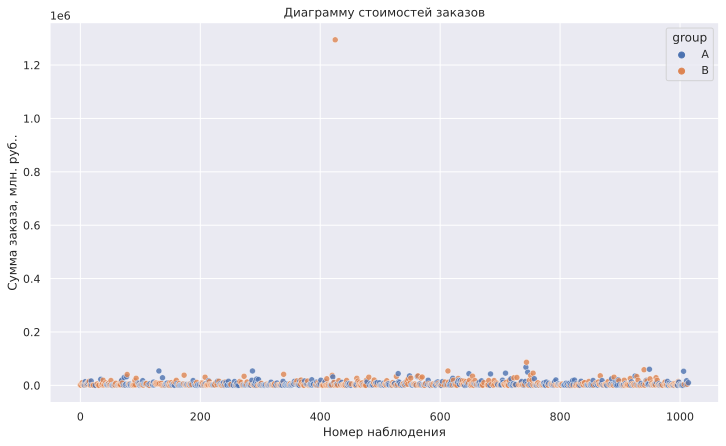

In [32]:
fig = sns.scatterplot(data=orders,
                      x=pd.Series(range(0, len(orders.revenue))), 
                      y="revenue", 
                      hue='group',
                      hue_order=['A', 'B'],
                      alpha=0.8)

fig.set(xlabel='Номер наблюдения',
        ylabel='Сумма заказа, млн. руб..',
        title='Диаграмму стоимостей заказов')
plt.show()

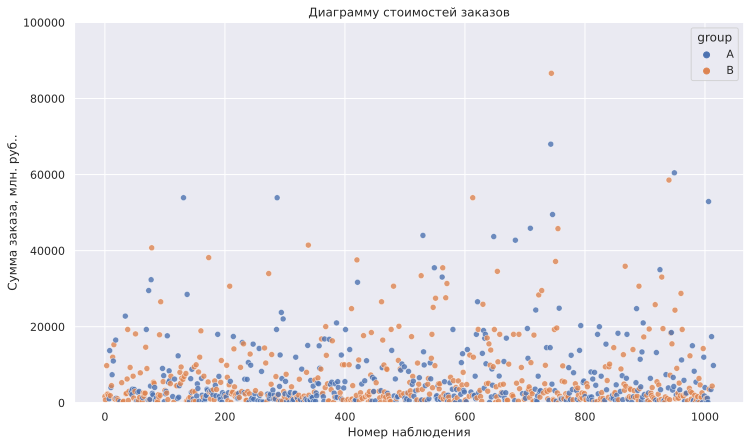

In [33]:
fig = sns.scatterplot(data=orders,
                      x=pd.Series(range(0, len(orders.revenue))), 
                      y="revenue", 
                      hue='group',
                      hue_order=['A', 'B'],
                      alpha=0.8)

fig.set(xlabel='Номер наблюдения',
        ylabel='Сумма заказа, млн. руб..',
        title='Диаграмму стоимостей заказов', 
        ylim=(0, 100000))
plt.show()

Большинство заказов не превышает 20 000 рублей, но есть выброс в 1.3 млн. рублей. Данный выброс относится к группе B, он, скорее всего, и повлиял на кумулятивные графики.



### 95-й и 99-й перцентили стоимости заказов

In [34]:
print(f"Стоимость заказов для 5% пользователей: {np.percentile(orders.revenue, [95, 99])[0]}\
      \nСтоимость заказов для 1% пользователей: {np.percentile(orders.revenue, [95, 99])[1]}") 

Стоимость заказов для 5% пользователей: 26785.0      
Стоимость заказов для 1% пользователей: 53904.0


Выберем сумму в **53904** рублей за нижнюю границу стоимости заказов, и уберем аномальных пользователей по ней.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [35]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']
visitors_cummulative_a.head()

,date,visitors_cummulative_a
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [36]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']
visitors_cummulative_b.head()

,date,visitors_cummulative_b
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [37]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_cummulative_a.tail()

,date,orders_cummulative_a,revenue_cummulative_a
26,2019-08-27,419,2940471
27,2019-08-28,434,3036933
28,2019-08-29,451,3233233
29,2019-08-30,460,3311413
30,2019-08-31,468,3364656


In [38]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_cummulative_b = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

orders_cummulative_b.tail()

,date,orders_cummulative_b,revenue_cummulative_b
26,2019-08-27,473,4579312
27,2019-08-28,495,4640510
28,2019-08-29,510,4746610
29,2019-08-30,531,4955833
30,2019-08-31,548,5068972


In [39]:
data = (
    orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
                  .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
                  .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
                  .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
                  .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
                  .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
                  .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [40]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_a.head()

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [41]:
orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users_b.columns = ['user_id', 'orders']

orders_by_users_b.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


In [42]:
sample_a = pd.concat(
    [orders_by_users_a['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), 
                                 name='orders')],axis=0
)

sample_a.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [43]:
sample_b = pd.concat(
    [orders_by_users_b['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), 
                                 name='orders')],axis=0
)

sample_b.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

**Гипотезы:**

$H_{0}$: В значениях среднего количестве заказов на посетителя между группой В и группой А по «сырым» данным **отсутстует** статистически значимое различие

$H_{1}$: В значении среднего количестве заказов на посетителя между группой В и группой А по «сырым» данным **присутствует** статистически значимое различие

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.011
0.160


P-value меньше 0.05, потому нулевую гипотезу отвергаем. По «сырым» данным можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия. Однако, заметим, что если уровень значимости станет равен 0.01, то нулевая гипотеза может быть принята.

Относительный прирост среднего группы B к конверсии группы A равен **16%**.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Гипотезы:**

$H_{0}$: В значениях среднего чека между группой В и группой А по «сырым» данным **отсутстует** статистически значимое различие

$H_{1}$: В значениях среднего чека между группой В и группой А по «сырым» данным **присутствует** статистически значимое различие


In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


Относительное различие среднего чека между групами по «сырым» данным составляет **28.7%**. Хотя относительное различие и велико это может быть следствием влияния аномальных заказов.
    
    
P-value значительно больше 0.05, потому нулевую гипотезу принимаем. Полученное значение p-value говорит о том, что хотя средние чеки, пришедшие из разных групп, неодинаковы, с вероятностью в почти **83%** такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками. Это подтвержает то, что относительное различие в **28.7%** не является статистически значимым.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [46]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],
    ],
    axis=0,
)

users_with_expensive_orders = orders[orders['revenue'] > 53904]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sample_filtered_a = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_filtered_b = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Гипотезы:**

$H_{0}$: В значениях среднего количестве заказов на посетителя между группой В и группой А по «очищенным» данным **отсутстует** статистически значимое различие

$H_{1}$: В значении среднего количестве заказов на посетителя между группой В и группой А по «очищенным» данным **присутствует** статистически значимое различие

In [47]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_filtered_a, sample_filtered_b)[1]))
print('{0:.3f}'.format(sample_filtered_b.mean()/sample_filtered_a.mean()-1))

0.007
0.189


Как и в случае с «сырыми» данными, по «очищенным» данным можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия. Заметим, что при повышении уровня значимости до 0.01 нулевая гипотеза также будет отвергнута.

Относительный прирост среднего группы B к конверсии группы A равен **18.9%**. Разница между  «сырыми» и «очищенными» данными составляет **2.9%**

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [48]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


Относительное различие среднего чека между сегментами составляет **-3.2%**. Это означает, что относительное различие сместилось в сторону группы А и приблизилось к **0%**. Разница между  «сырыми» и «очищенными» данными составляет **31.9%**.
    
P-value по «очищенным» данным снизился, но значение все равно больше 0,05, следовательно, нулевую гипотезу принимаем. Значит,  статистически значимых отличий в среднем чеке между группами нет. 

## Выводы:

- Относительное различие в среднем количестве заказов на посетителя группы B к группе A равен **18.9%** по «очищенным» данным.
- Относительное различие среднего чека между сегментами составляет **-3.2%**. Это означает, что средний чек группы B по «очищенным» данным ниже среднего чека группы A.
- Есть статистически значимая разница в среднем количестве заказов на посетителя между группами как по «сырым» данным, так и по «очищенным»;
- Нет статистически значимого различия по среднему чеку между группами как по «сырым» данным, так и по «очищенным»;

**Заключение**

Тест можно остановить. По результамтам теста следует, что произошел прирост конверсии в группе B, однако на среднем чеке это не сказалась. 

PS: Как я понимаю тест был к следующей гипотезе: `"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"`. Можно ли однозначно сказать, что группа B победила? Ведь средний чек не изменился т.е. подтвердилась только половина гипотезы